In [2]:
# Regression Project
# Kiarash Geraili, Emery, Ryan 

In [3]:
import pandas as pd

df = pd.read_csv('cook_county_train_val.csv')
df.info()  # Check the data types and missing values
df.describe()  # Basic statistics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204792 entries, 0 to 204791
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  204792 non-null  int64  
 1   PIN                         204792 non-null  int64  
 2   Property Class              204792 non-null  int64  
 3   Neighborhood Code           204792 non-null  int64  
 4   Land Square Feet            204792 non-null  float64
 5   Town Code                   204792 non-null  int64  
 6   Apartments                  204792 non-null  float64
 7   Wall Material               204792 non-null  float64
 8   Roof Material               204792 non-null  float64
 9   Basement                    204792 non-null  float64
 10  Basement Finish             204792 non-null  float64
 11  Central Heating             204792 non-null  float64
 12  Other Heating               204792 non-null  float64
 13  Central Air   

,Unnamed: 0,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,...,Sale Quarter of Year,Sale Month of Year,Sale Half of Year,Most Recent Sale,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Lot Size
count,204792.000000,2.047920e+05,204792.000000,204792.000000,2.047920e+05,204792.000000,204792.000000,204792.000000,204792.000000,204792.000000,...,204792.000000,204792.000000,204792.000000,204792.000000,204792.000000,204792.000000,204792.000000,204792.000000,204792.000000,2.047920e+05
mean,102395.500000,1.664208e+13,212.357856,120.493769,7.809451e+03,44.448758,0.000230,1.900484,1.113520,1.608007,...,2.557859,6.647364,1.527320,0.755747,6.598121,0.817337,0.874644,120.493769,25684.615415,7.809451e+03
std,59118.502501,8.161252e+12,24.097636,110.624143,1.525110e+04,23.531694,0.034728,0.794124,0.593602,0.954730,...,1.068619,3.270146,0.499254,0.429644,2.900149,0.386391,0.331123,110.624143,29132.316884,1.525110e+04
min,0.000000,1.011000e+12,202.000000,10.000000,1.697381e+02,10.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.100000,0.000000,0.000000,10.000000,1011.000000,1.697381e+02
25%,51197.750000,1.036224e+13,203.000000,40.000000,3.810000e+03,23.000000,0.000000,1.000000,1.000000,1.000000,...,2.000000,4.000000,1.000000,1.000000,5.100000,1.000000,1.000000,40.000000,2850.000000,3.810000e+03
50%,102395.500000,1.607416e+13,203.000000,81.000000,5.775000e+03,37.000000,0.000000,2.000000,1.000000,1.000000,...,3.000000,7.000000,2.000000,1.000000,6.200000,1.000000,1.000000,81.000000,7270.000000,5.775000e+03
75%,153593.250000,2.409123e+13,205.000000,162.000000,8.515000e+03,71.000000,0.000000,2.000000,1.000000,2.000000,...,3.000000,9.000000,2.000000,1.000000,8.900000,1.000000,1.000000,162.000000,70120.000000,8.515000e+03
max,204791.000000,3.332302e+13,278.000000,600.000000,2.980767e+06,77.000000,6.000000,4.000000,6.000000,4.000000,...,4.000000,12.000000,2.000000,1.000000,17.200000,1.000000,1.000000,600.000000,77170.000000,2.980767e+06


In [4]:
# Drop the first column if it's redundant
df = df.drop(df.columns[0], axis=1)

# Verify that the first column is dropped
print(df.head())


              PIN  Property Class  Neighborhood Code  Land Square Feet  \
0  17294100610000             203                 50            2500.0   
1  13272240180000             202                120            3780.0   
2  25221150230000             202                210            4375.0   
3  10251130030000             203                220            4375.0   
4  31361040550000             202                120            8400.0   

   Town Code  Apartments  Wall Material  Roof Material  Basement  \
0         76         0.0            2.0            1.0       1.0   
1         71         0.0            2.0            1.0       1.0   
2         70         0.0            2.0            1.0       2.0   
3         17         0.0            3.0            1.0       1.0   
4         32         0.0            3.0            1.0       2.0   

   Basement Finish  ...  Sale Month of Year  Sale Half of Year  \
0              3.0  ...                   9                  2   
1             

In [5]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns that have missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


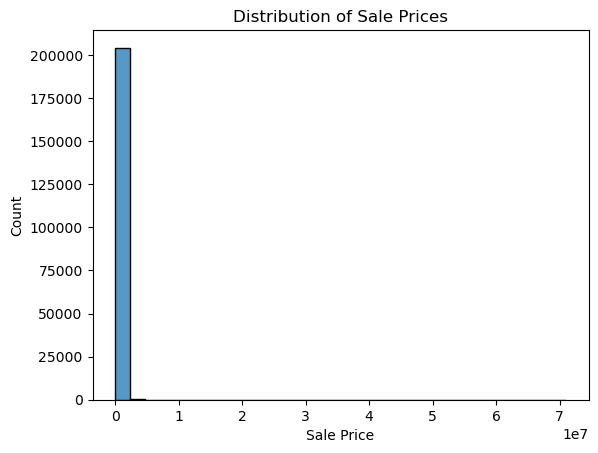

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Sale Price'], bins=30)
plt.title('Distribution of Sale Prices')
plt.show()

In [7]:
df.columns

Index(['PIN', 'Property Class', 'Neighborhood Code', 'Land Square Feet',
       'Town Code', 'Apartments', 'Wall Material', 'Roof Material', 'Basement',
       'Basement Finish', 'Central Heating', 'Other Heating', 'Central Air',
       'Fireplaces', 'Attic Type', 'Attic Finish', 'Design Plan',
       'Cathedral Ceiling', 'Construction Quality', 'Site Desirability',
       'Garage 1 Size', 'Garage 1 Material', 'Garage 1 Attachment',
       'Garage 1 Area', 'Garage 2 Size', 'Garage 2 Material',
       'Garage 2 Attachment', 'Garage 2 Area', 'Porch', 'Other Improvements',
       'Building Square Feet', 'Repair Condition', 'Multi Code',
       'Number of Commercial Units', 'Estimate (Land)', 'Estimate (Building)',
       'Deed No.', 'Sale Price', 'Longitude', 'Latitude', 'Census Tract',
       'Multi Property Indicator', 'Modeling Group', 'Age', 'Use',
       'O'Hare Noise', 'Floodplain', 'Road Proximity', 'Sale Year',
       'Sale Quarter', 'Sale Half-Year', 'Sale Quarter of Year',
     

In [8]:
df['Deed No.']

0         1525745095
1         1814316064
2         1604916034
3         1320441110
4         1616242072
             ...    
204787    1420417143
204788    1908601088
204789    1403155015
204790    1805318002
204791    1411242017
Name: Deed No., Length: 204792, dtype: int64

In [13]:
print(type(df['PIN'].iloc[0]))
print(type(df['Deed No.'].iloc[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


In [ ]:
df['Description'].iloc[0]

In [17]:
# Drop the descriptive column if it's not useful for regression
df = df.drop(['Description'], axis=1)

# Verify the result
print(df.head())

              PIN  Property Class  Neighborhood Code  Land Square Feet  \
0  17294100610000             203                 50            2500.0   
1  13272240180000             202                120            3780.0   
2  25221150230000             202                210            4375.0   
3  10251130030000             203                220            4375.0   
4  31361040550000             202                120            8400.0   

   Town Code  Apartments  Wall Material  Roof Material  Basement  \
0         76         0.0            2.0            1.0       1.0   
1         71         0.0            2.0            1.0       1.0   
2         70         0.0            2.0            1.0       2.0   
3         17         0.0            3.0            1.0       1.0   
4         32         0.0            3.0            1.0       2.0   

   Basement Finish  ...  Sale Quarter of Year  Sale Month of Year  \
0              3.0  ...                     3                   9   
1       

In [18]:
#I personally think the discription column is redundant as we have the data in other columns
#In case we want to use Description column as usefull information for prediction model!

#from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
#tfidf = TfidfVectorizer(max_features=100)  # You can adjust the number of features

# Fit and transform the descriptive text
#tfidf_matrix = tfidf.fit_transform(df['description_column_name'].astype(str))

# Convert the TF-IDF matrix to a DataFrame and merge with original data
#tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
#df = pd.concat([df, tfidf_df], axis=1)

# Drop the original description column
#df = df.drop(['description_column_name'], axis=1)

# Verify the result
#print(df.head())


In [22]:
# Check for non-numeric values (strings) in the entire DataFrame
non_numeric = df.applymap(lambda x: isinstance(x, str))

# Print rows where strings are found
print("Rows with string values:")
print(df[non_numeric.any(axis=1)])


C:\Users\kiara\AppData\Local\Temp\ipykernel_22792\532737658.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric = df.applymap(lambda x: isinstance(x, str))


Rows with string values:
                   PIN  Property Class  Neighborhood Code  Land Square Feet  \
0       17294100610000             203                 50            2500.0   
1       13272240180000             202                120            3780.0   
2       25221150230000             202                210            4375.0   
3       10251130030000             203                220            4375.0   
4       31361040550000             202                120            8400.0   
...                ...             ...                ...               ...   
204787  25163010260000             202                321            4375.0   
204788   5063010090000             204                 21           16509.0   
204789  16333020150000             202                 90            3810.0   
204790   9242030500000             203                 80            6650.0   
204791  19102030080000             203                 30            2500.0   

        Town Code  Apartme

In [23]:
# Check specific columns (e.g., 'Sale Price') for string values
numeric_column = 'Sale Price'
has_strings = df[numeric_column].apply(lambda x: isinstance(x, str))

# Print rows where string values are found in the numeric column
print(df[has_strings])


Empty DataFrame
Columns: [PIN, Property Class, Neighborhood Code, Land Square Feet, Town Code, Apartments, Wall Material, Roof Material, Basement, Basement Finish, Central Heating, Other Heating, Central Air, Fireplaces, Attic Type, Attic Finish, Design Plan, Cathedral Ceiling, Construction Quality, Site Desirability, Garage 1 Size, Garage 1 Material, Garage 1 Attachment, Garage 1 Area, Garage 2 Size, Garage 2 Material, Garage 2 Attachment, Garage 2 Area, Porch, Other Improvements, Building Square Feet, Repair Condition, Multi Code, Number of Commercial Units, Estimate (Land), Estimate (Building), Deed No., Sale Price, Longitude, Latitude, Census Tract, Multi Property Indicator, Modeling Group, Age, Use, O'Hare Noise, Floodplain, Road Proximity, Sale Year, Sale Quarter, Sale Half-Year, Sale Quarter of Year, Sale Month of Year, Sale Half of Year, Most Recent Sale, Age Decade, Pure Market Filter, Garage Indicator, Neigborhood Code (mapping), Town and Neighborhood, Lot Size]
Index: []

[0

In [27]:
# Find all cells in the DataFrame that contain "SF"
sf_cells = df.applymap(lambda x: 'SF' in str(x))

# Get the rows where at least one cell contains "SF"
rows_with_sf = df[sf_cells.any(axis=1)]

# Print the rows
print(rows_with_sf)


C:\Users\kiara\AppData\Local\Temp\ipykernel_22792\2621442277.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sf_cells = df.applymap(lambda x: 'SF' in str(x))


                   PIN  Property Class  Neighborhood Code  Land Square Feet  \
0       17294100610000             203                 50            2500.0   
1       13272240180000             202                120            3780.0   
2       25221150230000             202                210            4375.0   
3       10251130030000             203                220            4375.0   
4       31361040550000             202                120            8400.0   
...                ...             ...                ...               ...   
204787  25163010260000             202                321            4375.0   
204788   5063010090000             204                 21           16509.0   
204789  16333020150000             202                 90            3810.0   
204790   9242030500000             203                 80            6650.0   
204791  19102030080000             203                 30            2500.0   

        Town Code  Apartments  Wall Material  Roof 

In [32]:
df[sf_cells.any(axis=1)]

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Sale Quarter of Year,Sale Month of Year,Sale Half of Year,Most Recent Sale,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Lot Size
0,17294100610000,203,50,2500.0,76,0.0,2.0,1.0,1.0,3.0,...,3,9,2,1.0,13.2,0,0.0,50,7650,2500.0
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,2,5,1,1.0,9.6,1,1.0,120,71120,3780.0
2,25221150230000,202,210,4375.0,70,0.0,2.0,1.0,2.0,3.0,...,1,2,1,0.0,11.2,1,1.0,210,70210,4375.0
3,10251130030000,203,220,4375.0,17,0.0,3.0,1.0,1.0,3.0,...,3,7,2,1.0,6.3,1,1.0,220,17220,4375.0
4,31361040550000,202,120,8400.0,32,0.0,3.0,1.0,2.0,3.0,...,2,6,1,0.0,6.3,1,1.0,120,32120,8400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204787,25163010260000,202,321,4375.0,72,0.0,2.0,1.0,1.0,1.0,...,3,7,2,0.0,5.8,1,1.0,321,72321,4375.0
204788,5063010090000,204,21,16509.0,23,0.0,1.0,1.0,1.0,1.0,...,1,3,1,1.0,9.3,1,1.0,21,2321,16509.0
204789,16333020150000,202,90,3810.0,15,0.0,2.0,1.0,1.0,1.0,...,1,1,1,1.0,5.9,1,1.0,90,1590,3810.0
204790,9242030500000,203,80,6650.0,22,0.0,2.0,1.0,1.0,3.0,...,1,2,1,1.0,6.0,1,1.0,80,2280,6650.0


In [35]:
# Use one-hot encoding to convert categorical columns to numeric format
df_encoded = pd.get_dummies(df, drop_first=True)

# Now you can calculate the correlation matrix on the encoded DataFrame
corr_matrix = df_encoded.corr()

# Display the correlation matrix
print(corr_matrix)

                                 PIN  Property Class  Neighborhood Code  \
PIN                         1.000000       -0.140785           0.230174   
Property Class             -0.140785        1.000000          -0.107618   
Neighborhood Code           0.230174       -0.107618           1.000000   
Land Square Feet           -0.075180        0.069960          -0.079227   
Town Code                   0.134703       -0.141247           0.440037   
Apartments                 -0.000891       -0.002356          -0.000858   
Wall Material               0.005975        0.103427          -0.033142   
Roof Material              -0.073957        0.032028          -0.038316   
Basement                   -0.042622        0.034218          -0.085567   
Basement Finish             0.054586       -0.046239           0.025256   
Central Heating            -0.002264       -0.126381          -0.021942   
Other Heating              -0.047452        0.047925          -0.034505   
Central Air              

<Axes: >

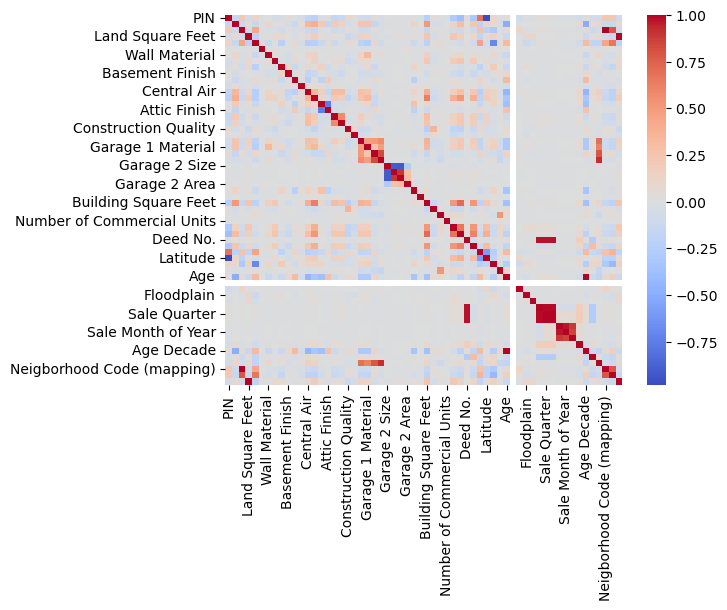

In [36]:
sns.heatmap(corr_matrix, cmap='coolwarm')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('Sale Price', axis=1)
y = df['Sale Price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

ValueError: could not convert string to float: 'SF'